# Unsupervised outliers detection (event detection)

In [1]:
import drama as drm
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec

from drama.outlier_finder import grid_run_drama

from keras.datasets import mnist

%matplotlib inline

n_try = 5

Using TensorFlow backend.


In [2]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [18]:
inlier_labels = [2,3,4,6,8]
outlier_labels = [5,0]
n_inliers = 500
n_outliers = 10

X = []
y = []
for i in inlier_labels:
    filt = y_train==i
    ns = np.sum(filt)
    X.extend(x_train[filt][:n_inliers])
    y.extend(n_inliers*[0])
    
for i in outlier_labels:
    filt = y_train==i
    ns = np.sum(filt)
    X.extend(x_train[filt][:n_outliers])
    y.extend(n_outliers*[1])
    
X = np.array(X)
y = np.array(y)

In [19]:
X.shape,y.shape

((2520, 28, 28), (2520,))

In [20]:
X = np.reshape(X, [-1, image_size*image_size])

In [21]:
lof_all = np.zeros((n_try,3))
ifr_all = np.zeros((n_try,3))
df = drm.sk_check(X.reshape(-1,784),X.reshape(-1,784),y,[1])
for i in range(n_try):
    for j,scr in enumerate(['AUC','MCC','RWS']):
        lof_all[i,j] = df[scr][0]
        ifr_all[i,j] = df[scr][1]

/home/gf/packages/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


In [22]:
df

,method,AUC,MCC,RWS
0,LOF35,0.90794,0.0928,0.128571
1,i-forest,0.68152,0.1432,0.166667


# Outlier detection

Unsupervised outlier detection mode.


W1116 19:02:34.121680 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.
W1116 19:02:48.950055 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.
W1116 19:02:54.008523 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.


Unsupervised outlier detection mode.


W1116 19:03:41.732322 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.
W1116 19:03:56.252493 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.
W1116 19:04:02.725486 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.


Unsupervised outlier detection mode.


W1116 19:04:53.080024 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.
W1116 19:05:08.136874 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.
W1116 19:05:13.876438 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.


Unsupervised outlier detection mode.


W1116 19:06:04.970319 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.
W1116 19:06:19.921662 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.
W1116 19:06:24.606009 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.


Unsupervised outlier detection mode.


W1116 19:07:14.649170 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.
W1116 19:07:29.373644 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.
W1116 19:07:35.422482 140112914851648 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.


Text(0, -30, '** Colors depend on AUC.')

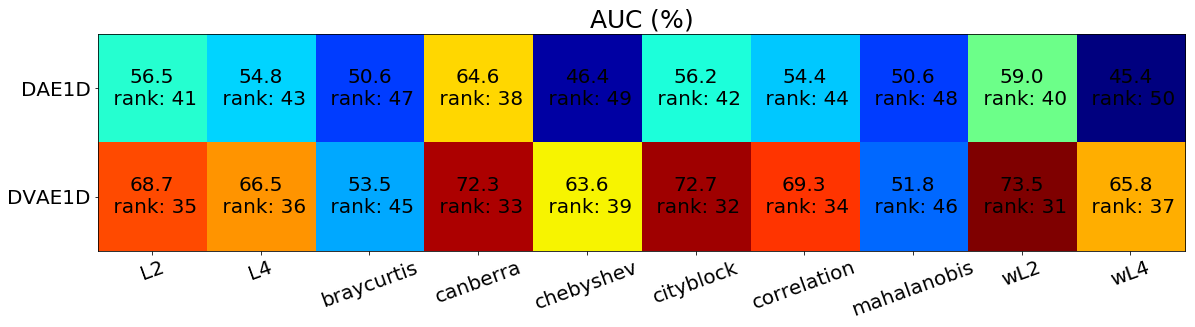

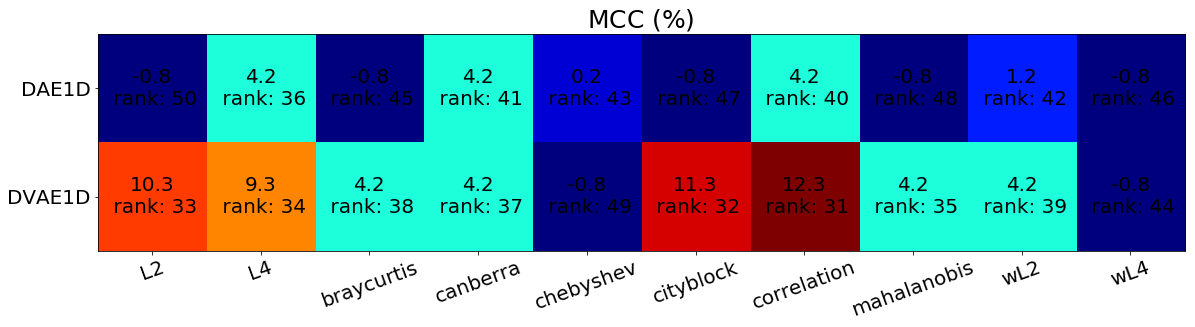

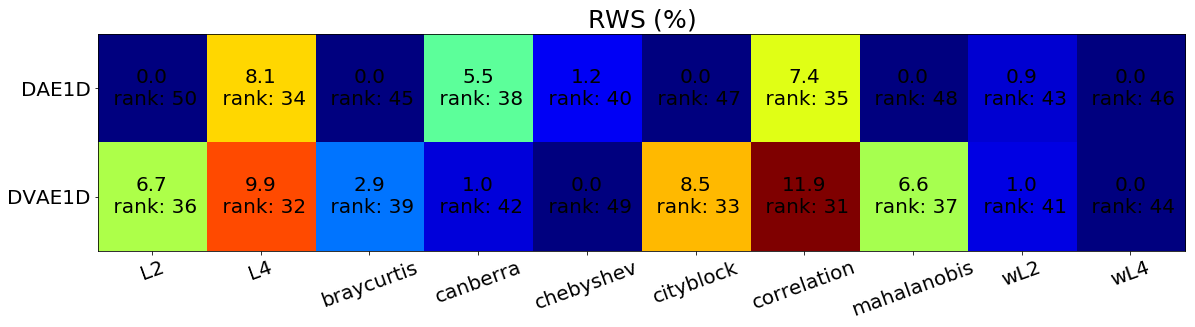

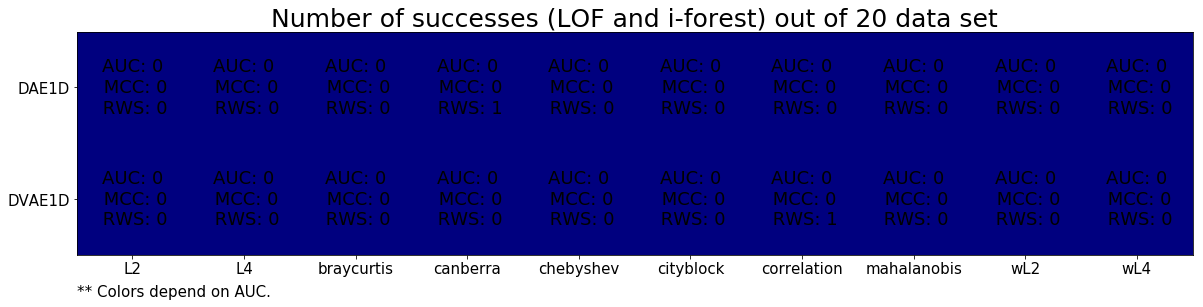

In [23]:
metrics = ['cityblock', 'L2', 'L4', 'braycurtis', 'canberra', 'chebyshev',
                        'correlation', 'mahalanobis', 'wL2', 'wL4']
drt_list = ['DAE1D', 'DVAE1D']

result = []
for i in range(n_try):
#     auc,mcc,rws,conf = grid_run_drama(X,y)
    auc,mcc,rws,conf = grid_run_drama(X,y,
                                      drt_list=drt_list,
                                      metrics=metrics,
                                      n_split=2)
    
    arr = np.stack([auc,mcc,rws],axis=-1)
    result.append(arr)
result = np.array(result)

drts = np.unique(conf[:,1])
metrs = np.unique(conf[:,2])

res = result.reshape(n_try,len(drt_list),len(metrics),-1)

drm.plot_table(np.mean(res,axis=0),drts,metrs)

auc = np.sum((res[:, :, :, 0].T>lof_all[:, 0]) & (res[:, :, :, 0].T>ifr_all[:, 0]),axis=-1).T
mcc = np.sum((res[:, :, :, 1].T>lof_all[:, 1]) & (res[:, :, :, 1].T>ifr_all[:, 1]),axis=-1).T
rws = np.sum((res[:, :, :, 2].T>lof_all[:, 2]) & (res[:, :, :, 2].T>ifr_all[:, 2]),axis=-1).T

fig = plt.figure(figsize=(20,10))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect('auto')
ax.imshow(auc, cmap=plt.cm.jet,interpolation='nearest')

width, height = auc.shape

for x in range(width):
    for y in range(height):
        ax.annotate('AUC: {:d}\n MCC: {:d}\n RWS: {:d}'.format(auc[x][y],mcc[x][y],rws[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center',fontsize=18);

plt.xticks(range(len(metrs)),metrs,fontsize=15)
plt.yticks(range(len(drts)), drts,fontsize=15)

plt.title('Number of successes (LOF and i-forest) out of 20 data set',fontsize=25)
plt.annotate('** Colors depend on AUC.', (0,0), (0, -30), xycoords='axes fraction',
             textcoords='offset points', va='top',fontsize=15)

# plt.savefig('AND_success.jpg',dpi=150,bbox_inches='tight')

In [24]:
inlier_labels = [1,2,3,4]
outlier_labels = [5]
n_inliers = 1000
n_outliers = 30

X = []
y = []
for i in inlier_labels:
    filt = y_train==i
    ns = np.sum(filt)
    X.extend(x_train[filt][:n_inliers])
    y.extend(n_inliers*[0])
    
for i in outlier_labels:
    filt = y_train==i
    ns = np.sum(filt)
    X.extend(x_train[filt][:n_outliers])
    y.extend(n_outliers*[1])
    
X = np.array(X)
y = np.array(y)
X = np.reshape(X, [-1, image_size*image_size, 1])

Unsupervised outlier detection mode.


W1116 19:09:00.867611 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.
W1116 19:09:40.484597 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.
W1116 19:10:09.087338 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.


Unsupervised outlier detection mode.


W1116 19:11:36.392061 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.
W1116 19:12:14.336708 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.
W1116 19:12:34.571760 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.


Unsupervised outlier detection mode.


W1116 19:14:08.634591 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.
W1116 19:14:46.340116 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.
W1116 19:15:02.506853 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.


Unsupervised outlier detection mode.


W1116 19:16:36.003625 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.
W1116 19:17:16.805724 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.
W1116 19:17:34.935648 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.


Unsupervised outlier detection mode.


W1116 19:19:08.553288 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.
W1116 19:19:46.532668 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.
W1116 19:20:04.321418 140112914851648 training_utils.py:1348] Output conv1d_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv1d_3.


Text(0, -30, '** Colors depend on AUC.')

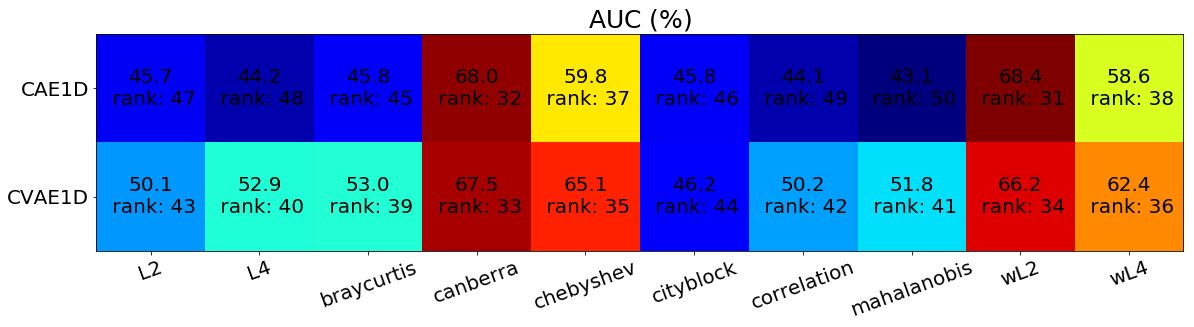

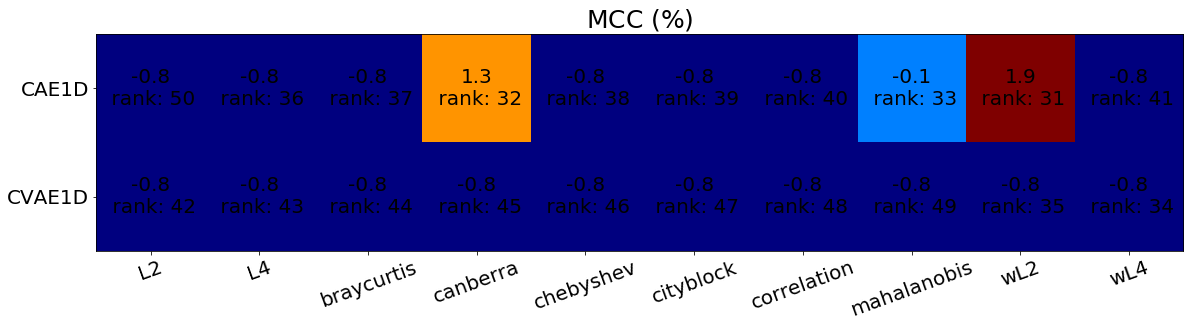

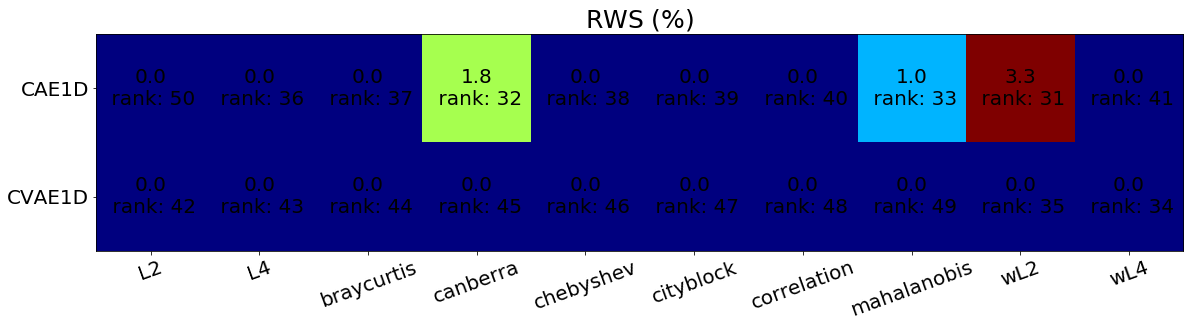

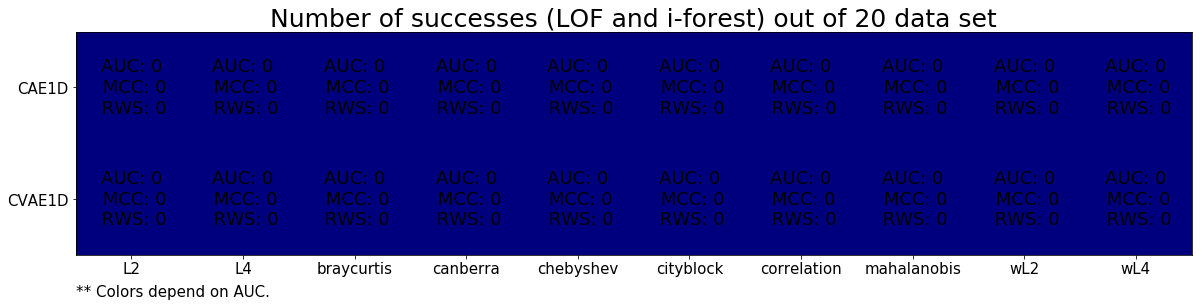

In [25]:
metrics = ['cityblock', 'L2', 'L4', 'braycurtis', 'canberra', 'chebyshev',
                        'correlation', 'mahalanobis', 'wL2', 'wL4']
drt_list = ['CAE1D', 'CVAE1D']

result = []
for i in range(n_try):
#     auc,mcc,rws,conf = grid_run_drama(X,y)
    auc,mcc,rws,conf = grid_run_drama(X,y,
                                      drt_list=drt_list,
                                      metrics=metrics,
                                      n_split=2)
    
    arr = np.stack([auc,mcc,rws],axis=-1)
    result.append(arr)
result = np.array(result)

drts = np.unique(conf[:,1])
metrs = np.unique(conf[:,2])

res = result.reshape(n_try,len(drt_list),len(metrics),-1)

drm.plot_table(np.mean(res,axis=0),drts,metrs)

auc = np.sum((res[:, :, :, 0].T>lof_all[:, 0]) & (res[:, :, :, 0].T>ifr_all[:, 0]),axis=-1).T
mcc = np.sum((res[:, :, :, 1].T>lof_all[:, 1]) & (res[:, :, :, 1].T>ifr_all[:, 1]),axis=-1).T
rws = np.sum((res[:, :, :, 2].T>lof_all[:, 2]) & (res[:, :, :, 2].T>ifr_all[:, 2]),axis=-1).T

fig = plt.figure(figsize=(20,10))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect('auto')
ax.imshow(auc, cmap=plt.cm.jet,interpolation='nearest')

width, height = auc.shape

for x in range(width):
    for y in range(height):
        ax.annotate('AUC: {:d}\n MCC: {:d}\n RWS: {:d}'.format(auc[x][y],mcc[x][y],rws[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center',fontsize=18);

plt.xticks(range(len(metrs)),metrs,fontsize=15)
plt.yticks(range(len(drts)), drts,fontsize=15)

plt.title('Number of successes (LOF and i-forest) out of 20 data set',fontsize=25)
plt.annotate('** Colors depend on AUC.', (0,0), (0, -30), xycoords='axes fraction',
             textcoords='offset points', va='top',fontsize=15)

# plt.savefig('AND_success.jpg',dpi=150,bbox_inches='tight')

In [26]:
inlier_labels = [1,2,3,4]
outlier_labels = [5]
n_inliers = 1000
n_outliers = 30

X = []
y = []
for i in inlier_labels:
    filt = y_train==i
    ns = np.sum(filt)
    X.extend(x_train[filt][:n_inliers])
    y.extend(n_inliers*[0])
    
for i in outlier_labels:
    filt = y_train==i
    ns = np.sum(filt)
    X.extend(x_train[filt][:n_outliers])
    y.extend(n_outliers*[1])
    
X = np.array(X)
y = np.array(y)
X = np.reshape(X, [-1, image_size, image_size, 1])

Unsupervised outlier detection mode.


W1116 19:21:45.018787 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:22:25.954258 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:22:47.767972 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.


Unsupervised outlier detection mode.


W1116 19:24:42.579233 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:25:25.008066 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:25:57.426306 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.


Unsupervised outlier detection mode.


W1116 19:27:27.562603 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:28:05.845240 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:28:35.750273 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.


Unsupervised outlier detection mode.


W1116 19:30:15.950171 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:31:05.068086 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:31:35.685768 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.


Unsupervised outlier detection mode.


W1116 19:33:10.237427 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:34:00.941555 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.
W1116 19:34:27.686230 140112914851648 training_utils.py:1348] Output conv2d_transpose_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to conv2d_transpose_1.


Text(0, -30, '** Colors depend on AUC.')

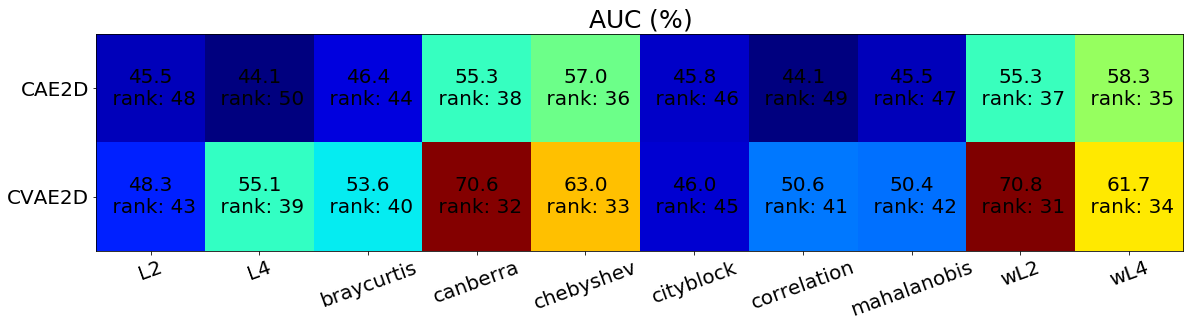

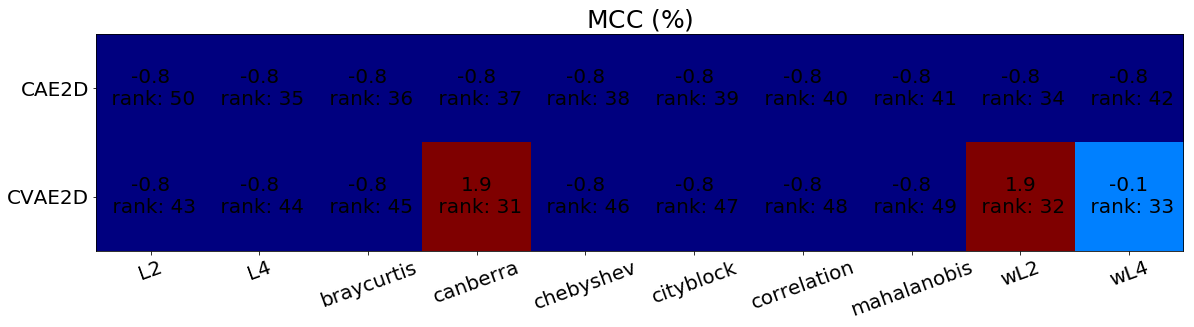

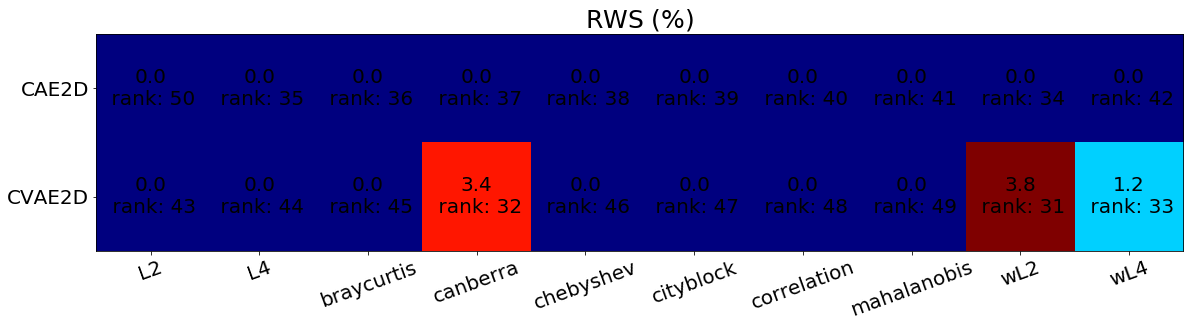

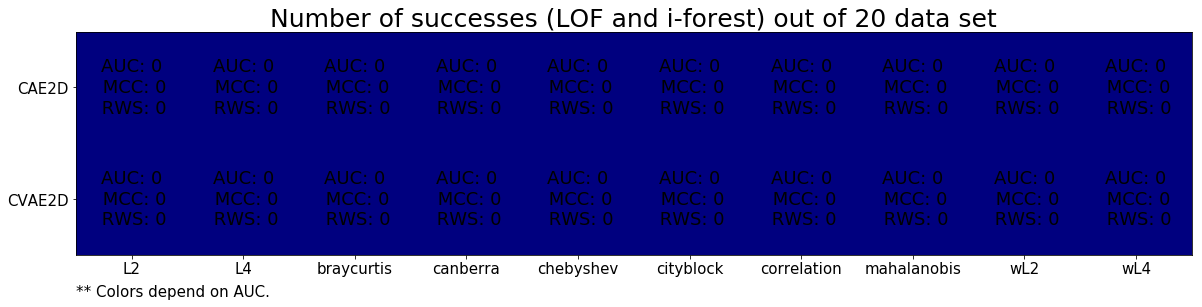

In [27]:
metrics = ['cityblock', 'L2', 'L4', 'braycurtis', 'canberra', 'chebyshev',
                        'correlation', 'mahalanobis', 'wL2', 'wL4']
drt_list = ['CAE2D', 'CVAE2D']

result = []
for i in range(n_try):
#     auc,mcc,rws,conf = grid_run_drama(X,y)
    auc,mcc,rws,conf = grid_run_drama(X,y,
                                      drt_list=drt_list,
                                      metrics=metrics,
                                      n_split=2)
    
    arr = np.stack([auc,mcc,rws],axis=-1)
    result.append(arr)
result = np.array(result)

drts = np.unique(conf[:,1])
metrs = np.unique(conf[:,2])

res = result.reshape(n_try,len(drt_list),len(metrics),-1)

drm.plot_table(np.mean(res,axis=0),drts,metrs)

auc = np.sum((res[:, :, :, 0].T>lof_all[:, 0]) & (res[:, :, :, 0].T>ifr_all[:, 0]),axis=-1).T
mcc = np.sum((res[:, :, :, 1].T>lof_all[:, 1]) & (res[:, :, :, 1].T>ifr_all[:, 1]),axis=-1).T
rws = np.sum((res[:, :, :, 2].T>lof_all[:, 2]) & (res[:, :, :, 2].T>ifr_all[:, 2]),axis=-1).T

fig = plt.figure(figsize=(20,10))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect('auto')
ax.imshow(auc, cmap=plt.cm.jet,interpolation='nearest')

width, height = auc.shape

for x in range(width):
    for y in range(height):
        ax.annotate('AUC: {:d}\n MCC: {:d}\n RWS: {:d}'.format(auc[x][y],mcc[x][y],rws[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center',fontsize=18);

plt.xticks(range(len(metrs)),metrs,fontsize=15)
plt.yticks(range(len(drts)), drts,fontsize=15)

plt.title('Number of successes (LOF and i-forest) out of 20 data set',fontsize=25)
plt.annotate('** Colors depend on AUC.', (0,0), (0, -30), xycoords='axes fraction',
             textcoords='offset points', va='top',fontsize=15)

# plt.savefig('AND_success.jpg',dpi=150,bbox_inches='tight')